In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error,confusion_matrix
import joblib

In [ ]:
data= pd.read_csv("mani_crop_dataset.csv")
data

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label
0,143,69,217,5.9,0.58,0.23000,10.20,116.35,59.96,54.85,21.29,pomegranate
1,170,36,216,5.9,0.15,0.28000,15.69,114.20,56.87,31.28,28.62,pomegranate
2,158,66,219,6.8,0.34,0.20000,15.29,65.87,51.81,57.12,27.59,pomegranate
3,133,45,207,6.4,0.94,0.21000,8.48,103.10,43.81,68.50,47.29,pomegranate
4,132,48,218,6.7,0.54,0.19000,5.59,63.40,56.40,46.71,31.04,pomegranate
...,...,...,...,...,...,...,...,...,...,...,...,...
615,41,23,135,5.0,1.67,0.10655,26.00,39.20,206.89,31.09,20.64,potato
616,49,45,90,5.8,1.98,0.09229,19.00,40.20,91.12,32.68,14.91,potato
617,131,24,121,4.9,2.24,0.08775,22.00,40.00,94.34,24.93,23.74,potato
618,131,55,130,5.3,2.48,0.08983,15.00,41.00,92.58,45.73,21.48,potato


In [ ]:
data['label'].unique()

array(['pomegranate', 'mango', 'grapes', 'mulberry', 'ragi', 'potato'],
      dtype=object)

In [ ]:
target_column='label'
num_samples=200
for label in data[target_column].unique():
      # Filter rows for the current label
      subset = data[data[target_column] == label].iloc[:, :-1]

      # Calculate how many rows to generate for this label
      current_count = subset.shape[0]
      samples_to_generate = max(num_samples - current_count, 0)

      # Generate synthetic data for this label
      for _ in range(samples_to_generate):
          row = subset.sample(1).values[0]  # Randomly pick a row
          noise = np.random.normal(0, 0.005, row.shape)  # Add small Gaussian noise
          print("i")
          synthetic_row = row + noise  # Add noise to the selected row
          synthetic_data.append(synthetic_row)
          labels.append(label)

In [ ]:
# since we need more rows of data, we have added additional rows by bring slight noise noise to existing data
"""
# Function to generate synthetic data using Gaussian noise
def generate_synthetic_data(data, target_column, num_samples):
    synthetic_data = []
    labels = []

    for label in data[target_column].unique():
        # Filter rows for the current label
        subset = data[data[target_column] == label].iloc[:, :-1]

        # Calculate how many rows to generate for this label
        current_count = subset.shape[0]
        samples_to_generate = max(num_samples - current_count, 0)

        # Generate synthetic data for this label
        for _ in range(samples_to_generate):
            row = subset.sample(1).values[0]  # Randomly pick a row
            noise = np.random.normal(0, 0.05, row.shape)  # Add small Gaussian noise
            synthetic_row = row + noise  # Add noise to the selected row
            synthetic_data.append(synthetic_row)
            labels.append(label)

    # Convert to DataFrame
    synthetic_df = pd.DataFrame(synthetic_data, columns=data.columns[:-1])
    synthetic_df[target_column] = labels
    return synthetic_df

# Define the number of rows per label we want after augmentation
target_rows_per_label = 200

# Generate synthetic data
synthetic_data= generate_synthetic_data(data, target_column='label', num_samples=target_rows_per_label)

# Combine the original and synthetic data
augmented_data = pd.concat([data, synthetic_data], ignore_index=True)

# Save the augmented dataset
augmented_file_path = 'Final_augmented_crop_dataset_large.csv'
augmented_data.to_csv(augmented_file_path, index=False)

augmented_data.head(), augmented_data['label'].value_counts(), augmented_file_path
"""

<ipython-input-31-019c9bb5e113>:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  augmented_data = pd.concat([data, synthetic_data], ignore_index=True)


(       N     P      K   ph    EC     S     Cu      Fe     Mn     Zn      B  \
 0  143.0  69.0  217.0  5.9  0.58  0.23  10.20  116.35  59.96  54.85  21.29   
 1  170.0  36.0  216.0  5.9  0.15  0.28  15.69  114.20  56.87  31.28  28.62   
 2  158.0  66.0  219.0  6.8  0.34  0.20  15.29   65.87  51.81  57.12  27.59   
 3  133.0  45.0  207.0  6.4  0.94  0.21   8.48  103.10  43.81  68.50  47.29   
 4  132.0  48.0  218.0  6.7  0.54  0.19   5.59   63.40  56.40  46.71  31.04   
 
          label  
 0  pomegranate  
 1  pomegranate  
 2  pomegranate  
 3  pomegranate  
 4  pomegranate  ,
 label
 pomegranate    200
 mango          200
 grapes         200
 mulberry       200
 ragi           200
 potato         200
 Name: count, dtype: int64,
 'Final_augmented_crop_dataset_large.csv')

In [ ]:
data= pd.read_csv("new_augmented_crop_dataset.csv")
data
# now we have total 1200 rows of data.
# We decided to only double the data and not go further since we didnt want to upset the balance between real and generated data
# and naturally compromise data integrity

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label
0,143.000000,69.000000,217.000000,5.900000,0.580000,0.230000,10.200000,116.350000,59.960000,54.850000,21.290000,pomegranate
1,170.000000,36.000000,216.000000,5.900000,0.150000,0.280000,15.690000,114.200000,56.870000,31.280000,28.620000,pomegranate
2,158.000000,66.000000,219.000000,6.800000,0.340000,0.200000,15.290000,65.870000,51.810000,57.120000,27.590000,pomegranate
3,133.000000,45.000000,207.000000,6.400000,0.940000,0.210000,8.480000,103.100000,43.810000,68.500000,47.290000,pomegranate
4,132.000000,48.000000,218.000000,6.700000,0.540000,0.190000,5.590000,63.400000,56.400000,46.710000,31.040000,pomegranate
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,87.062027,58.960804,127.992413,6.003089,1.604161,0.109759,22.978489,39.441685,169.188071,30.795630,12.366016,potato
1196,79.980772,67.003556,115.987737,5.621984,2.230339,0.154365,15.084201,40.406399,74.970536,47.753797,14.846975,potato
1197,51.975444,37.951521,57.099055,5.106840,1.918448,0.033286,19.013571,38.697894,199.917650,41.030196,16.704819,potato
1198,139.954054,61.879705,86.009476,4.659934,1.686754,0.138661,22.990720,41.402798,234.216793,34.570016,13.192317,potato


# Exploratory Data Analysis

In [ ]:
print("Number of duplicate rows:\t ", data.duplicated().sum())
print("\nNumber of nan values:\n",data.isna().sum())

# non numeric columns seems to be only target column
non_numeric_cols = data.columns
print(f"\nNon-numeric columns: {non_numeric_cols.values}")

Number of duplicate rows:	  0

Number of nan values:
 N        0
P        0
K        0
ph       0
EC       0
S        0
Cu       0
Fe       0
Mn       0
Zn       0
B        0
label    0
dtype: int64

Non-numeric columns: ['N' 'P' 'K' 'ph' 'EC' 'S' 'Cu' 'Fe' 'Mn' 'Zn' 'B' 'label']


In [ ]:
data['label'].value_counts()

,count
label,
pomegranate,200
mango,200
grapes,200
mulberry,200
ragi,200
potato,200


We have a total of 6 types of crops with each of them having 200 rows of data. Hence it is safe to assume that the model will not be biased as the data is perfectly balanced

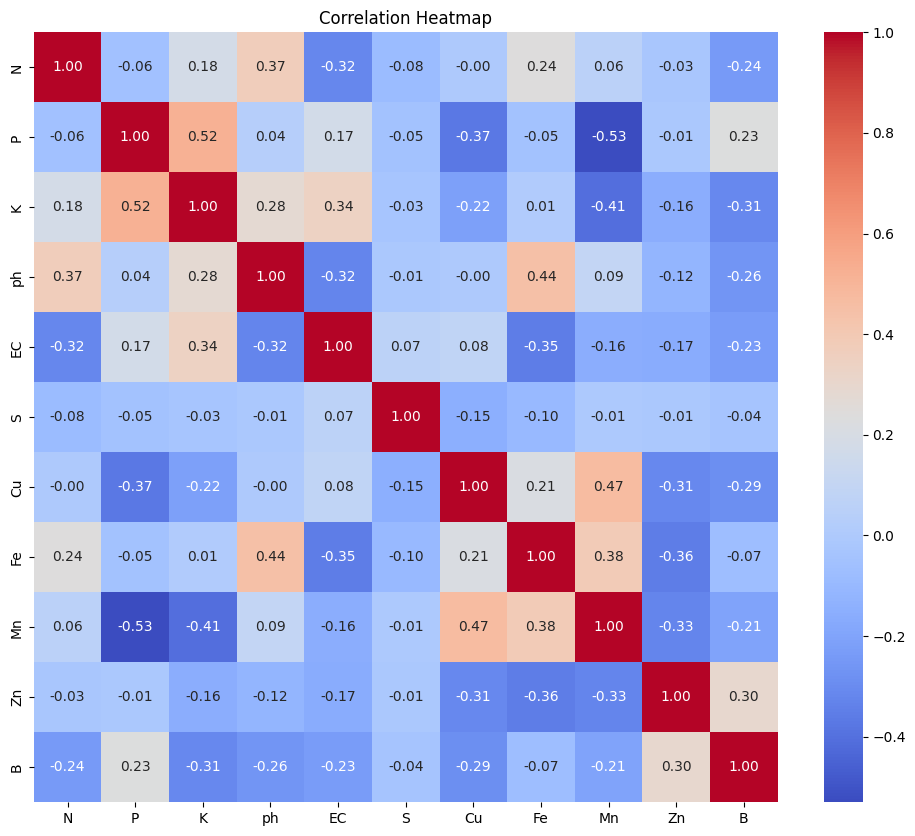

In [ ]:
# Let us look at the correlation of the features amidst themselves
correlation_matrix = data.drop(['label'],axis=1).corr()
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Create the heatmap
plt.title('Correlation Heatmap')  # Set the title
plt.show()

Correaltion among some features seems to be a little strong. If this leads to Multicolliniarity , it may negatively impact the accuracy of our model

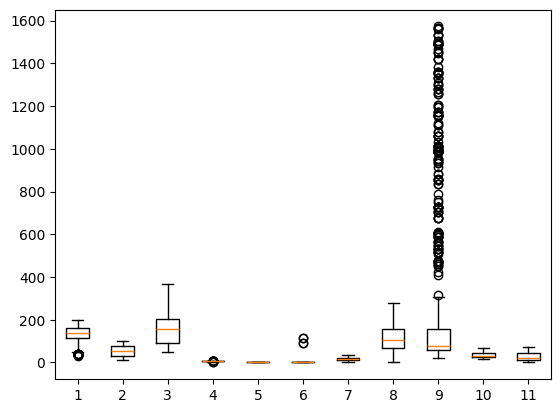

In [ ]:
# Let us generate a box plot to check for outliers in the numerical data
plt.boxplot(data.drop("label",axis=1))
plt.show()

### Although there seems to exist minor outlier count for a couple of features, the outlier count and range for values of columnn 9 which is Mn (level of Manganese in soil) seems to be suspiciously very high.

###  Lets explore Column 9 = Mn a bit more

In [ ]:
# lets draw up the description of the dataset to a bird's eye view on the nature of the data
data.describe()

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,135.840910,52.887727,162.099432,6.100277,0.898438,0.497369,17.453657,116.367088,218.606612,34.310256,28.557273
std,32.019298,24.688750,82.705959,0.687824,0.642961,5.869276,6.544264,63.047528,338.885021,11.554301,19.881510
min,30.000000,9.935019,51.000000,4.438187,0.010000,0.000009,0.180000,3.715658,20.580000,17.990000,1.020000
25%,115.000419,30.000000,88.999449,5.700000,0.306777,0.079936,12.643537,65.737500,59.383617,24.611611,13.191738
50%,138.000000,54.992225,159.000000,6.138195,0.800000,0.166147,16.882363,107.016674,76.629480,31.283841,22.737580
75%,160.065814,75.995871,205.234767,6.500000,1.390000,0.242285,22.091650,155.620000,158.290567,43.628366,42.405000
max,198.041627,100.044173,369.000000,8.000000,2.593424,113.215315,35.030123,276.720000,1572.540000,70.000000,74.565904


Here we can see that even though the 25th quantile of Mn is only 59 along with the its 75th quantile being 158, the maximum value of Mn seems to be extremely high i.e 1570.

This is evidennt enough to conclude that there seems to be some sort of abnormality in the Data of corresponding to Levels of Manganese in the dataset.

Before we handle this error by altering values of manganese, let us explore the intensity of effect of manganese in soil



---


Acoording to [Cropaia.com](https://cropaia.com/blog/manganese-in-plants-and-soil/#:~:text=It%20is%20absorbed%20by%20plants,are%20greater%20than%20400%20ppm.)

> *Manganese is an essential plant micronutrient . It is absorbed by plants as Mn2+. Manganese is an immobile nutrient and, therefore, deficiency symptoms show up on younger leaves first.*

> *A manganese level of 20 to 40 ppm (mg kg–) in plant tissue is sufficient for most plants*.

>  ***Toxicity might occur when manganese tissue levels are greater than 400 ppm***




---







Based on this Insight we can say that any value above 400 that is in the dataset is an abnormality and will only aid the model predict a crop for cultivation in an unaturally toxic soil

In [ ]:
#let us check the toatl number values that need to be handled
len(data[data["Mn"]>400])

168

Here we can see that the total number of values that indicate a Manganese Toxicity level is 168.

Clipping a number of values as large as 168 is not ideal as that would lead to repetition of the clipped value (400) which is can lead to the model overfitting on that particular value.

Thus we have handled the extreme values by mapping them betwween a set value range that is within the safe limits of manganese toxicity.

Since all these values are above 400, we wanted the values to still depict a high mn level even after being handled. Therefore we took a value range of 16 i.e from 400 to 384 inside which the new set of values will be set.

Instead of randomly selecting values from within range and mapping them, **we have used *MinMaxScaling method* to scale these values** within this range. Doing so has helped us scale these values to a safer range and simultaneously **preserve the relationship between the original values**



---


Handling extreme values of manganese

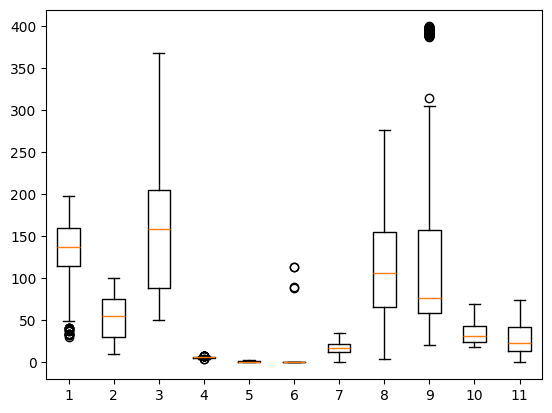

In [ ]:
#lets handle the major outlier feature Mn by scaling the outliers within globally known maximum possible Mn levels
outliers = data['Mn'] > 400

# Scale these outliers to the range 388–400
Mn_outliers = data.loc[outliers, 'Mn']
scaled_outliers = 388 + ((Mn_outliers - Mn_outliers.min()) / (Mn_outliers.max() - Mn_outliers.min())) * (400 - 388)

# Step 3: Replace original outlier values with scaled values
data.loc[outliers, 'Mn'] = scaled_outliers
plt.boxplot(data.drop(['label'],axis=1))
plt.show()



---

Handling Outlier

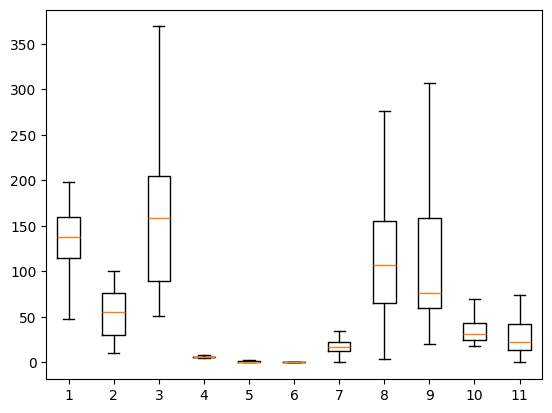

In [ ]:
# Handling the rest of the outliers using IQR Range method

def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    data[column_name] = data[column_name].clip(upper=ub)
    data[column_name] = data[column_name].clip(lower=lb)
    return data[column_name]

for col in data.drop(['label'],axis=1).columns:
  data[col] = remove_outliers(data, col)

# checking boxplot after handling outliers
plt.boxplot(data.drop(['label'],axis=1))
plt.show()



---
Distribution of Numerical data


In [ ]:
data.describe()

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,135.976081,52.887727,162.099432,6.099029,0.898438,0.161582,17.453657,116.367088,124.142118,34.310256,28.557273
std,31.617498,24.688750,82.705959,0.684350,0.642961,0.100200,6.544264,63.047528,94.630856,11.554301,19.881510
min,47.402325,9.935019,51.000000,4.500000,0.010000,0.000009,0.180000,3.715658,20.580000,17.990000,1.020000
25%,115.000419,30.000000,88.999449,5.700000,0.306777,0.079936,12.643537,65.737500,59.383617,24.611611,13.191738
50%,138.000000,54.992225,159.000000,6.138195,0.800000,0.166147,16.882363,107.016674,76.629480,31.283841,22.737580
75%,160.065814,75.995871,205.234767,6.500000,1.390000,0.242285,22.091650,155.620000,158.290567,43.628366,42.405000
max,198.041627,100.044173,369.000000,7.700000,2.593424,0.485808,35.030123,276.720000,306.650992,70.000000,74.565904



Histograms:


<Figure size 640x480 with 0 Axes>

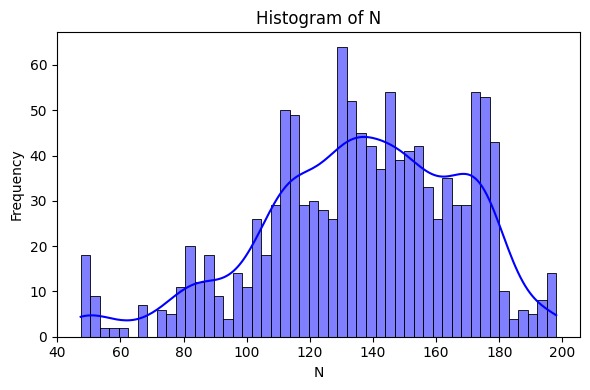

<Figure size 640x480 with 0 Axes>

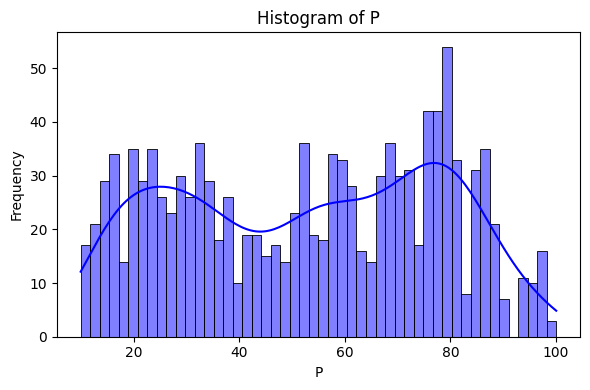

<Figure size 640x480 with 0 Axes>

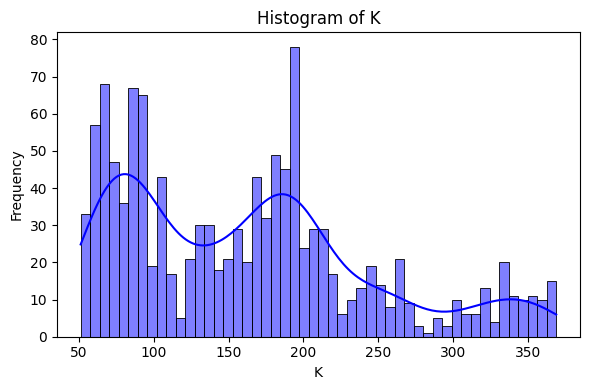

<Figure size 640x480 with 0 Axes>

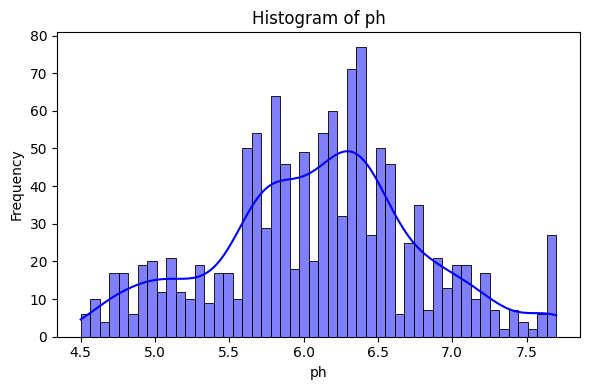

<Figure size 640x480 with 0 Axes>

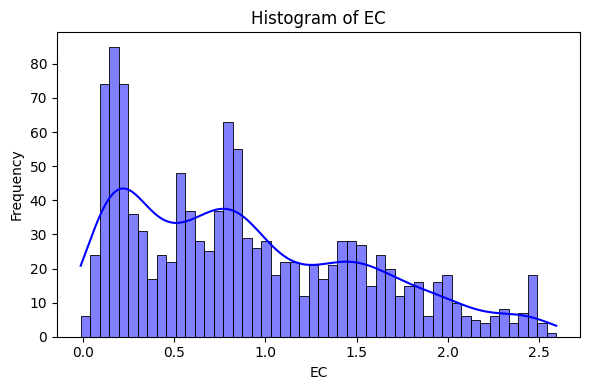

<Figure size 640x480 with 0 Axes>

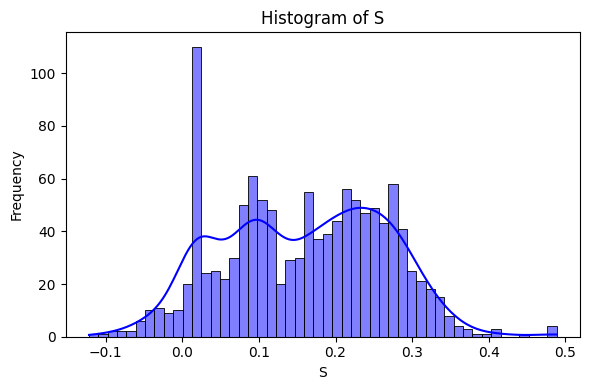

<Figure size 640x480 with 0 Axes>

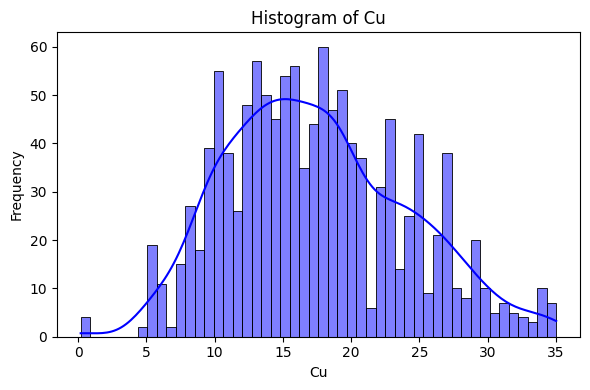

<Figure size 640x480 with 0 Axes>

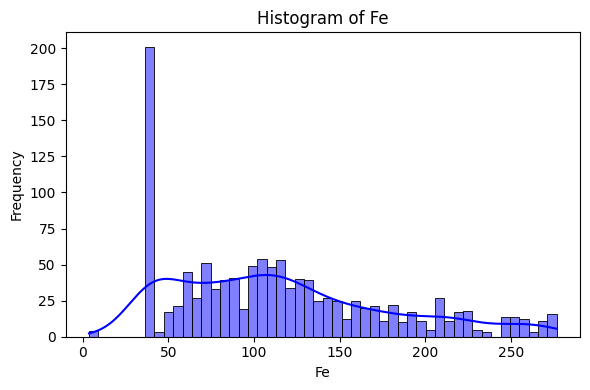

<Figure size 640x480 with 0 Axes>

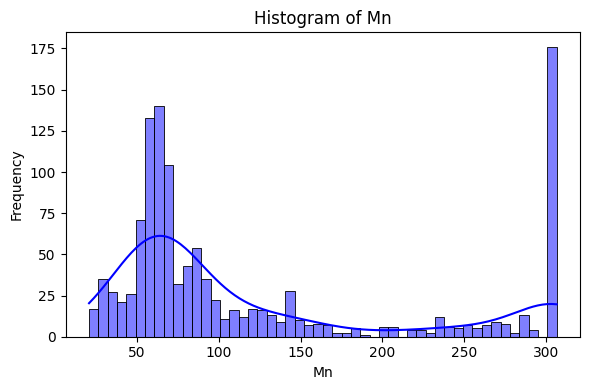

<Figure size 640x480 with 0 Axes>

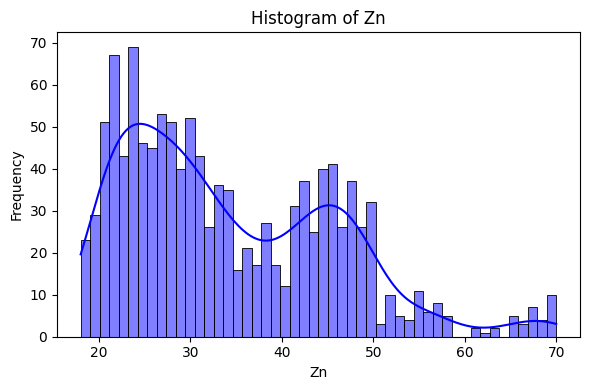

<Figure size 640x480 with 0 Axes>

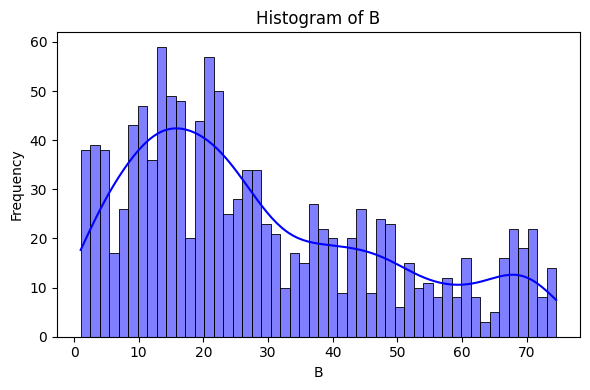

In [ ]:
# Histograms for each numerical column
print("\nHistograms:")
for col in data.select_dtypes(include=np.number).columns:
    plt.figure()  # Create a new figure for each histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, color='blue',bins=50)  # Create the histogram with KDE
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Based on the distribution pattern observed, the features can be scaled as follows:

> Standard Scaling : ph,Cu,N,S

> MinMax Scaling : K,P,EC,Fe,Mn,Zn,B



---
MultiCollinarity



*   Previously we had checked the correaltion between the features to check the relation that they had with each other.

*   Based on the observation we had predicted some overlap in relationship among features

*   Let us check for Multicollinearity between the features by canculation VIF value (Vriance Inflation factor) of features





In [ ]:
features = data.iloc[:, :-1]
# 2. Variance Inflation Factor (VIF)
# Add a small constant to avoid division by zero in VIF calculation
features_vif = features + 1e-6
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features_vif.values, i) for i in range(features_vif.shape[1])]

# Display VIF data
print(vif_data.sort_values(by="VIF", ascending=False))



   Feature        VIF
3       ph  64.463246
0        N  24.825484
2        K  14.701795
9       Zn  13.283492
6       Cu  12.776986
1        P  11.256990
8       Mn   8.985313
7       Fe   8.009742
10       B   6.791047
5        S   6.170771
4       EC   5.296472


Theoretically any VIF value above 5 is said to have high mutlicollinearity.

From the above o/p, it is evident that all features have a level of multicollinearity among which pH seems to have extremely high level of multicollinearity.

Multicollinearity can lead to overfitting, incapability of model in distinguishing between real and redudant data etc everything leading to inaccurate model predictions

Theoretically we can reduce multicollinearity by transforming the data from its original form to a more AI model freindly form.

*This can be achieved by scaling or transfor,ing the data.*

# Preprocessing

In [ ]:
#Let us scale teh features according to their distribution type
#Standard Scaling : ph,Cu,N,S
#MinMax Scaling : K,P,EC,Fe,Mn,Zn,B

std= StandardScaler()
mm=MinMaxScaler()

# Creating a copy of original data that will be used to store the scaled values of the data
scaled_data = pd.DataFrame(columns=data.drop(['label'],axis=1).columns,index=data.index)

scaled_data['ph']=std.fit_transform(data['ph'].values.reshape(-1,1))
scaled_data['Cu']=std.fit_transform(data['Cu'].values.reshape(-1,1))
scaled_data['N']=std.fit_transform(data['N'].values.reshape(-1,1))
scaled_data['S']=std.fit_transform(data['S'].values.reshape(-1,1))

scaled_data['K']=mm.fit_transform(data['K'].values.reshape(-1,1))
scaled_data['P']=mm.fit_transform(data['P'].values.reshape(-1,1))
scaled_data['EC']=mm.fit_transform(data['EC'].values.reshape(-1,1))
scaled_data['Fe']=mm.fit_transform(data['Fe'].values.reshape(-1,1))
scaled_data['Mn']=mm.fit_transform(data['Mn'].values.reshape(-1,1))
scaled_data['Zn']=mm.fit_transform(data['Zn'].values.reshape(-1,1))
scaled_data['B']=mm.fit_transform(data['B'].values.reshape(-1,1))

scaled_data

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B
0,0.222246,0.655483,0.522013,-0.290950,0.227143,0.680825,-1.108861,0.412573,0.137658,0.708710,0.275610
1,1.076559,0.289260,0.518868,-0.290950,0.062087,1.155682,-0.269609,0.404698,0.126857,0.255528,0.375276
2,0.696864,0.622190,0.528302,1.024714,0.135019,0.395911,-0.330757,0.227668,0.109169,0.752355,0.361271
3,-0.094167,0.389139,0.490566,0.439974,0.365330,0.490882,-1.371796,0.364039,0.081204,0.971159,0.629131
4,-0.125808,0.422432,0.525157,0.878529,0.211789,0.300940,-1.813589,0.218620,0.125214,0.552201,0.408180
...,...,...,...,...,...,...,...,...,...,...,...
1195,-1.547701,0.544071,0.242115,-0.140249,0.620270,-0.461125,0.844577,0.130862,0.519480,0.246215,0.154271
1196,-1.771761,0.633327,0.204364,-0.697368,0.860629,-0.037488,-0.362217,0.134396,0.190130,0.572271,0.188005
1197,-2.657885,0.310917,0.019179,-1.450431,0.740910,-1.187392,0.238463,0.128138,0.626899,0.442996,0.213266
1198,0.125868,0.576464,0.110093,-2.103741,0.651973,-0.186638,0.846447,0.138046,0.746796,0.318785,0.165506


Now that we have scaled all our numeric data, let us check VIF again

In [ ]:
features = scaled_data.iloc[:, :-1]
# 2. Variance Inflation Factor (VIF)

vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# Display VIF data
print(vif_data.sort_values(by="VIF", ascending=False))



  Feature       VIF
2       K  6.725075
1       P  6.196015
7      Fe  6.192369
4      EC  6.066580
8      Mn  4.690977
9      Zn  2.380105
3      ph  1.640099
6      Cu  1.623014
5       S  1.400210
0       N  1.353259


As it is evident , we have significantly reduced the multicollinearity of features as well. Even though VIF value 6 is slightly above the desirable value rage of 1 to 5, considering that it came down from 20s,30s 40s etc, we can assume that VIF=6 in this case is afforadable



---


Now Let us check the correlation of the label values with the features by one hot encoding them and then pulling up the correlation matrix.

For training we wont be one hotting the labels as they are the target. Instead we will only be label mapping them. Hence One Hotting is only for EDA on Scaled data

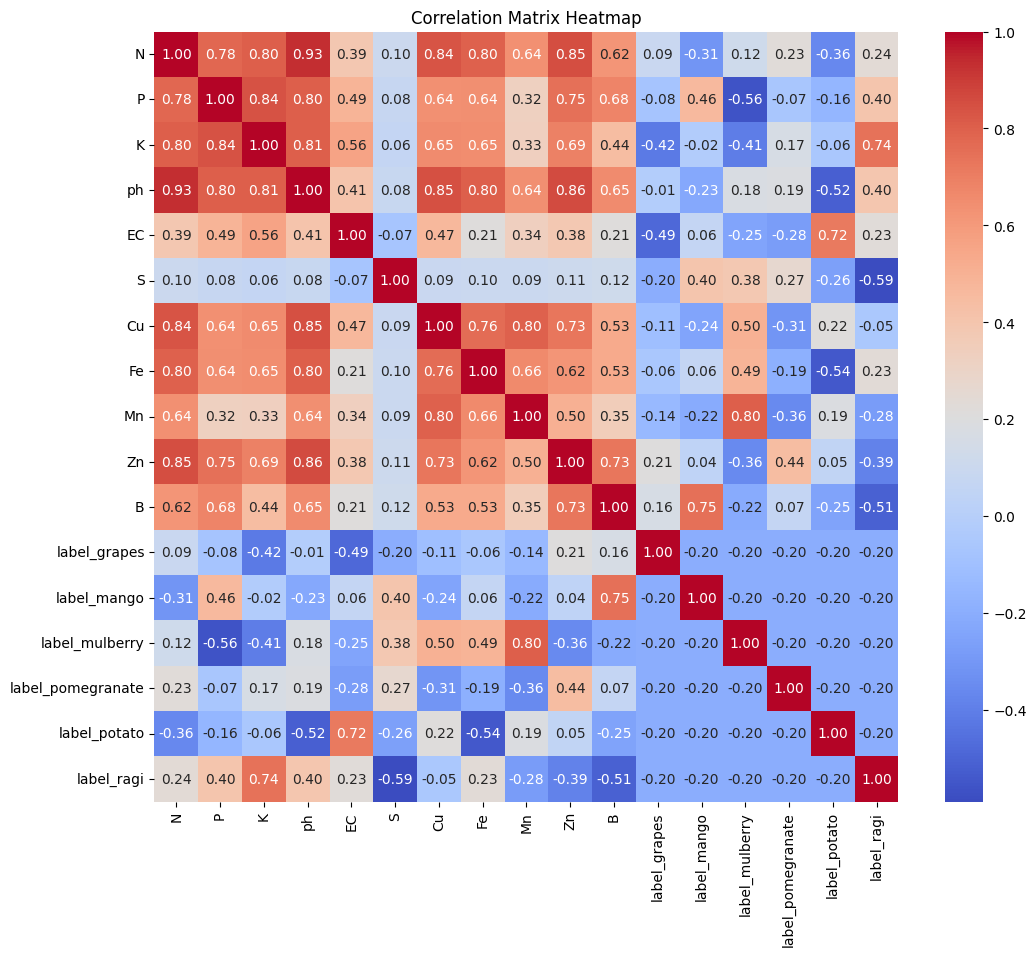

In [ ]:
ONE_data=pd.concat([scaled_data,pd.get_dummies(data,columns=['label'])])
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(ONE_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


From the map, we can deduce that except for grapes,all the other crops sees to have sufficient linear realtion with the features.

In [ ]:
# Let us map the unique values in label to make them
data['label'].unique()
crop_dict={'pomegranate' : 0, 'mango': 1 , 'grapes' : 2, 'mulberry': 3, 'ragi': 4, 'potato':5}
data['label'] = data['label'].map(crop_dict)
data['label']

,label
0,0
1,0
2,0
3,0
4,0
...,...
1195,5
1196,5
1197,5
1198,5


# Feature Importance Analysis

Let us analyse the importance of the features through tree based analysis and Permutation based analysis to see which features matter most

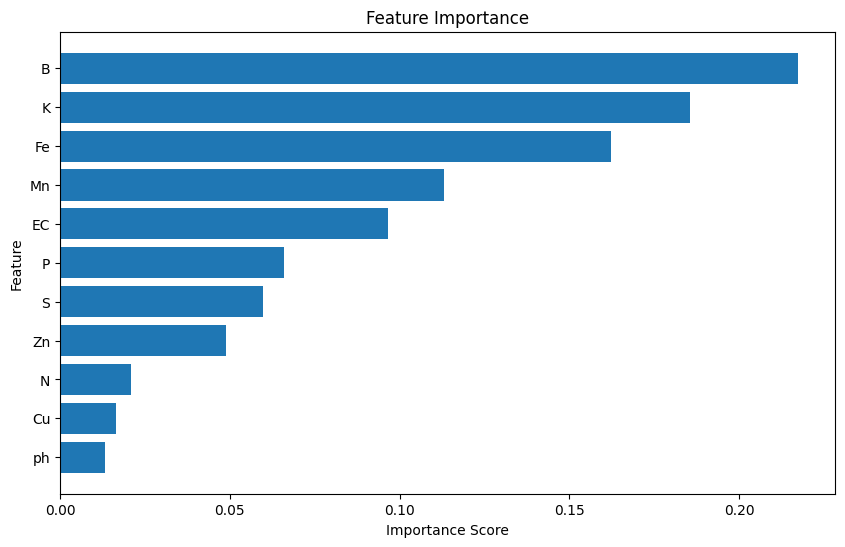

In [ ]:
final_df=pd.concat([scaled_data,data['label']],axis=1)
X=final_df.drop('label', axis=1)
y=final_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Tree based Feature importance
# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = rf.feature_importances_

# Map feature importance to feature names
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Analysis of Feature Importance (Tree-Based Model):

- Feature "B" (Boron) has the highest importance according to the tree-based model. This means the model relies heavily on Boron for making splits and predictions.

- K (Potassium) and Fe (Iron) follow closely behind, indicating their significant roles in the model's decisions.

- Features like Cu (Copper) and ph have the least importance, suggesting they contribute less to the model's predictions and could potentially be less relevant for classification.



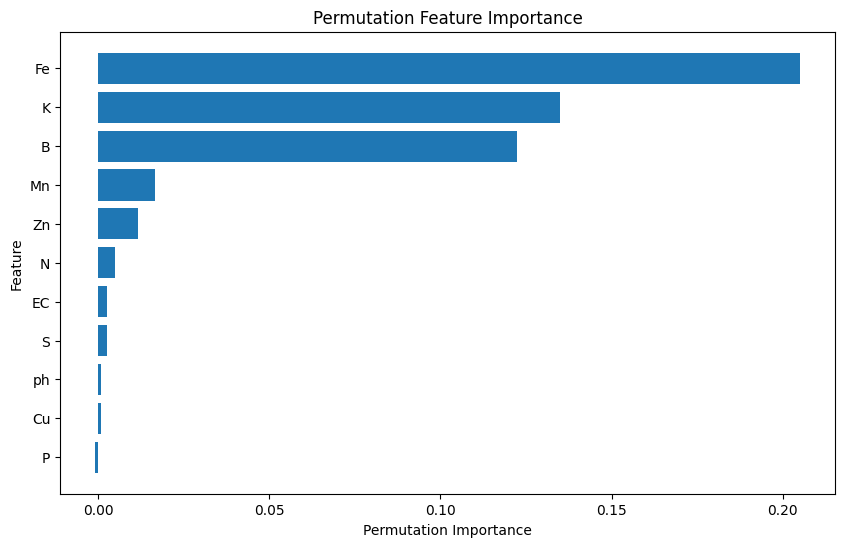

In [ ]:

# Calculate permutation importance
perm_importance = permutation_importance(rf, X_test, y_test, random_state=42)

# Map feature importance to feature names
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

#print(perm_importance_df)
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()
plt.show()


# Analysis of Permutation Feature Importance:

- Fe (Iron) ranks as the most important feature when using the permutation-based method, highlighting its strong impact on the model's performance.

- K (Potassium) and B (Boron) are also critical, with substantial permutation importance scores.

- Features such as EC and ph show very low permutation importance, suggesting they have minimal influence on the model's output.


# Key Observations:

Consistency for High-Importance Features:

- Both methods agree that Fe, K, and B are the most important features, albeit with slightly different rankings. This consistency reinforces their importance to the model's predictive capability.
Discrepancy in Lower-Importance Features:

- The tree-based model places higher importance on features like Mn (Manganese) and EC, while permutation importance assigns them relatively lower scores. This discrepancy could arise because tree-based models tend to measure feature importance based on split purity, whereas permutation importance evaluates the direct impact on model performance.

- Both methods indicate ph, Cu, and N have lower importance, suggesting they may be less critical for the model. This can be explored further to see if removing them affects performance.

# Model Creation and Prediction

RandomForest using features based on tree based feature importance graph

In [ ]:

X=data.drop('label', axis=1)
y=data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

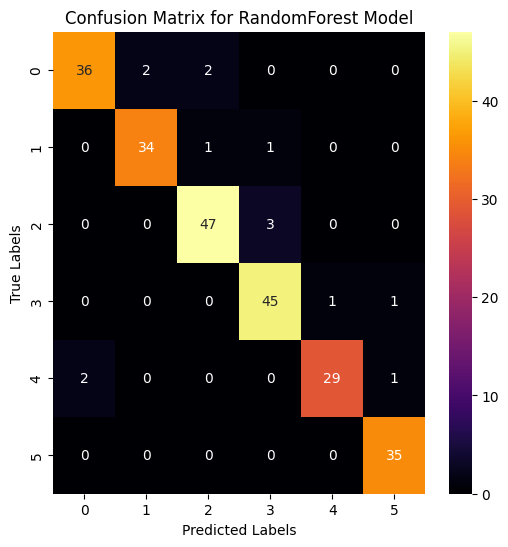

Training Accuracy RandomForest: 97.19%

Test Accuracy RandomForest: 94.17%


In [ ]:
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

# Define the columns to be scaled
standard_scaling_columns = ['ph', 'Cu', 'N', 'S']
minmax_scaling_columns = ['K', 'P', 'EC', 'Fe', 'Mn', 'Zn', 'B']

# Create a ColumnTransformer with different scalers for different sets of columns
preprocessor = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_scaling_columns),
        ('minmax', MinMaxScaler(), minmax_scaling_columns)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        max_features='sqrt',
        min_samples_split=10,
        n_estimators=100,
        min_samples_leaf=5,
        max_depth=6,
        random_state=42
    ))
])

# Train the model with the pipeline
pipeline.fit(X_train, y_train)

# Predict using the pipeline
y_pred_rf2 = pipeline.predict(X_test)

# Evaluate accuracy
conf_mat_rf2 = confusion_matrix(y_test, y_pred_rf2)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat_rf2, annot=True, fmt="d", cmap="inferno", xticklabels=data['label'].unique(), yticklabels=data['label'].unique())
plt.title("Confusion Matrix for RandomForest Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Evaluate training accuracy
y_train_predrf2 = pipeline.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_predrf2)
print(f"Training Accuracy RandomForest: {training_accuracy * 100:.2f}%")

# Evaluate test accuracy
test_accuracy = accuracy_score(y_test, y_pred_rf2)
print(f"\nTest Accuracy RandomForest: {test_accuracy * 100:.2f}%")


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(pipeline, X, y, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [0.94166667 0.97916667 0.97083333 0.96666667 0.95833333]
Mean Accuracy: 0.9633333333333333


# Accuracy Gap:


> Training accuracy: 97.19%
<br>Mean cross-validation accuracy: 96.33%
<br>Test accuracy: 94.17%


>The gap between training, cross-validation, and test accuracies is small:
<br>Training-CV gap: 97.19% - 96.33% = 0.86%
<br>Training-Test gap: 97.19% - 94.17% = 3.02%
<br>This is within a reasonable range, which supports the conclusion that the model is not overfitting.

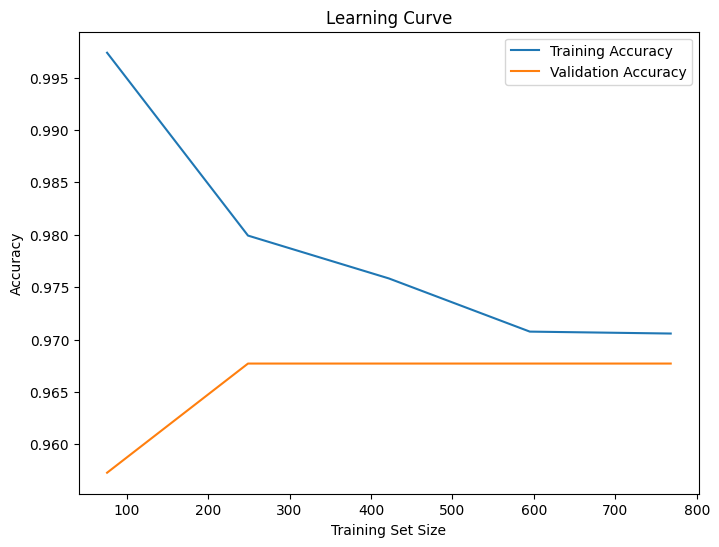

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Mean and std for training and test scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, test_mean, label="Validation Accuracy")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
joblib.dump(pipeline, 'random_forest_pipeline2.pkl')

['random_forest_pipeline2.pkl']

# USING  Gradient Boosting Algorithm to see if we can improve accuracy
# adopting XGB algorithm as it uses regularization to prevent Overfitting

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=300,        # Number of trees
    max_depth=5,             # Maximum depth of a tree
    learning_rate=0.01,       # Step size shrinkage
    subsample=0.8,           # Percentage of samples used per tree
    colsample_bytree=0.8,    # Percentage of features used per tree
    reg_alpha=1,              # L1 regularization
    reg_lambda=1,             # L2 regularization
    random_state=42          # Random seed for reproducibility
)
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluatoing test  accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# evaluating train accuracy
y_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)


print(f"Training Accuracy: {training_accuracy * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred))





Test Accuracy: 95.00%
Training Accuracy: 97.71%
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        40
           1       0.95      0.97      0.96        36
           2       0.96      0.94      0.95        50
           3       0.92      0.98      0.95        47
           4       0.97      0.91      0.94        32
           5       0.97      1.00      0.99        35

    accuracy                           0.95       240
   macro avg       0.95      0.95      0.95       240
weighted avg       0.95      0.95      0.95       240



In [ ]:
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the columns to be scaled
standard_scaling_columns = ['ph', 'Cu', 'N', 'S']
minmax_scaling_columns = ['K', 'P', 'EC', 'Fe', 'Mn', 'Zn', 'B']

# Create a ColumnTransformer for preprocessing
preprocessor2 = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_scaling_columns),
        ('minmax', MinMaxScaler(), minmax_scaling_columns)
    ])

# Create the pipeline
pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('classifier', XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        colsample_bytree=0.8,
        random_state=42
    ))
])

# Train the pipeline
pipeline2.fit(X_train2, y_train2)

# Predict on the test set
y_pred2 = pipeline2.predict(X_test2)

# Evaluate test accuracy
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f"Test Accuracy: {accuracy2 * 100:.2f}%")

# Evaluate training accuracy
y_train_pred2 = pipeline2.predict(X_train2)
training_accuracy2 = accuracy_score(y_train2, y_train_pred2)
print(f"Training Accuracy: {training_accuracy2 * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test2, y_pred2))

# Save the pipeline to a file
joblib.dump(pipeline2, 'xgboost_pipeline.pkl')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(pipeline2, X, y, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags

Cross-Validation Results (Accuracy): [nan nan nan nan nan]
Mean Accuracy: nan


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 144, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define parameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'max_depth': [5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,       # 3-fold cross-validation
    verbose=2,
    n_jobs=-1   # Use all processors
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {random_search.best_params_}")

# Evaluate on test set
best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_best_rf) * 100:.2f}%")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}
Test Accuracy: 96.25%


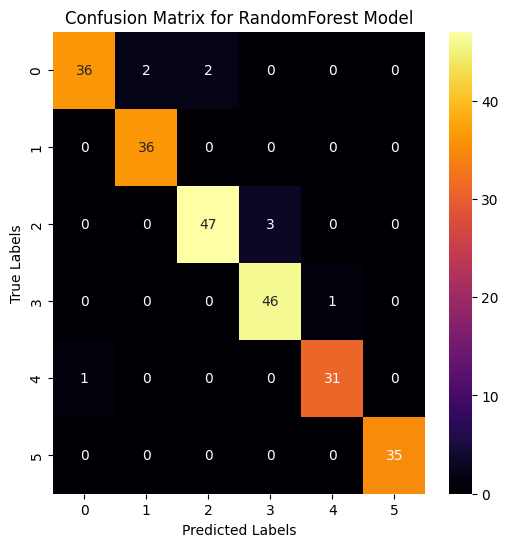

Training Accuracy RandomForest: 100.00%

Test Accuracy RandomForest: 96.25%


In [ ]:
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

# Define the columns to be scaled
standard_scaling_columns = ['ph', 'Cu', 'N', 'S']
minmax_scaling_columns = ['K', 'P', 'EC', 'Fe', 'Mn', 'Zn', 'B']

# Create a ColumnTransformer with different scalers for different sets of columns
preprocessor = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_scaling_columns),
        ('minmax', MinMaxScaler(), minmax_scaling_columns)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        max_features='sqrt',
        min_samples_split=2,
        n_estimators=300,
        min_samples_leaf=1,
        max_depth=15,
        random_state=42
    ))
])

# Train the model with the pipeline
pipeline.fit(X_train, y_train)

# Predict using the pipeline
y_pred_rf2 = pipeline.predict(X_test)

# Evaluate accuracy
conf_mat_rf2 = confusion_matrix(y_test, y_pred_rf2)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat_rf2, annot=True, fmt="d", cmap="inferno", xticklabels=data['label'].unique(), yticklabels=data['label'].unique())
plt.title("Confusion Matrix for RandomForest Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Evaluate training accuracy
y_train_predrf2 = pipeline.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_predrf2)
print(f"Training Accuracy RandomForest: {training_accuracy * 100:.2f}%")

# Evaluate test accuracy
test_accuracy = accuracy_score(y_test, y_pred_rf2)
print(f"\nTest Accuracy RandomForest: {test_accuracy * 100:.2f}%")


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(pipeline, X_train, y_train, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [0.984375   0.94791667 0.97395833 0.96354167 0.96875   ]
Mean Accuracy: 0.9677083333333332
